<a href="https://colab.research.google.com/github/nguyenthanhphat-144/TTNT/blob/main/Tuan4_Bai2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install networkx matplotlib numpy

In [19]:
from google.colab import files

uploaded = files.upload()  # chọn file tại đây
filename = list(uploaded.keys())[0]
print("Đã chọn file:", filename)


Saving matrix.txt to matrix.txt
Đã chọn file: matrix.txt


Nhập tên file txt ma trận kề: matrix.txt

=== Ma trận kề ===
[[0 1 1 0 0]
 [1 0 0 1 0]
 [1 0 0 1 1]
 [0 1 1 0 1]
 [0 0 1 1 0]]

=== Kết quả tô màu ===
Đỉnh 0 → Màu 1
Đỉnh 1 → Màu 0
Đỉnh 2 → Màu 0
Đỉnh 3 → Màu 1
Đỉnh 4 → Màu 2


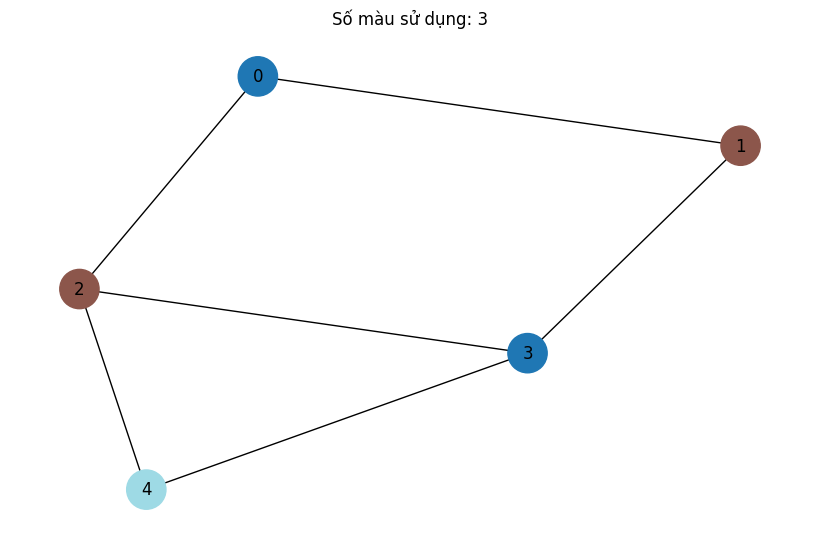

In [22]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


# ==========================
# 1) Đọc ma trận từ file txt
def doc_ma_tran(file_path: str) -> np.ndarray:
    """
    Đọc file txt chứa ma trận kề.
    - Bỏ dòng rỗng.
    - Bỏ dòng có '#'.
    - Hỗ trợ dấu phẩy hoặc tab.
    """
    du_lieu = []

    with open(file_path, "r", encoding="utf-8") as f:
        for dong in f:
            dong = dong.strip()
            if not dong or dong.startswith("#"):
                continue

            parts = dong.replace(",", " ").split()
            du_lieu.append([int(x) for x in parts])

    # kiểm tra hợp lệ
    n = len(du_lieu[0])
    for i, row in enumerate(du_lieu):
        if len(row) != n:
            raise ValueError(f"Dòng {i} không cùng kích thước ma trận.")

    return np.array(du_lieu)


# ==========================
# 2) Tạo đồ thị từ ma trận
def tao_do_thi(adj: np.ndarray) -> nx.Graph:
    """
    Tạo đồ thị vô hướng từ ma trận kề.
    """
    n = adj.shape[0]
    G = nx.Graph()
    G.add_nodes_from(range(n))

    # duyệt nửa tam giác trên để tránh duplicate cạnh
    for i in range(n):
        for j in range(i + 1, n):
            if adj[i][j] or adj[j][i]:
                G.add_edge(i, j)

    return G


# ==========================
# 3) Tô màu đồ thị
def to_mau_do_thi(G: nx.Graph) -> dict:
    """
    Áp dụng thuật toán greedy để tô màu đỉnh.
    Trả về dict: {đỉnh: màu}
    """
    return nx.coloring.greedy_color(G, strategy="largest_first")


# ==========================
# 4) Hiển thị + in kết quả
def hien_thi_do_thi(G: nx.Graph, colors: dict):
    """
    Vẽ đồ thị với màu sắc tương ứng.
    """
    pos = nx.spring_layout(G, seed=42)
    cmap = plt.get_cmap("tab20")

    # ánh xạ màu
    ds_mau = list(colors.values())
    max_c = max(ds_mau) if ds_mau else 1
    col_map = [cmap(c / max_c) for c in ds_mau]

    plt.figure(figsize=(8, 5))
    nx.draw(G, pos, node_color=col_map, with_labels=True, node_size=800)

    # in số màu
    plt.title(f"Số màu sử dụng: {len(set(ds_mau))}")
    plt.show()


# ==========================
# 5) Hàm main
def main():
    file_path = input("Nhập tên file txt ma trận kề: ")

    try:
        adj = doc_ma_tran(file_path)
    except Exception as e:
        print("❌ Lỗi đọc file:", e)
        return

    print("\n=== Ma trận kề ===")
    print(adj)

    G = tao_do_thi(adj)
    colors = to_mau_do_thi(G)

    print("\n=== Kết quả tô màu ===")
    for node in sorted(colors):
        print(f"Đỉnh {node} → Màu {colors[node]}")

    hien_thi_do_thi(G, colors)


# Chạy chương trình
if __name__ == "__main__":
    main()
